In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from functions import calculate_m, calculate_M, calculate_theta, fin_temp_distribution, teste

In [2]:
# Tolerância 
tol = 1e-10

# Comprimento da aleta (m)
L = 300e-3

# Densidade (kg/mˆ3)
d = 2700

# Condutividade térmica (W/(mK))
k = 180

# Calor específico (J/(kgK))
c = 896

# Temperatura na extremidade
Text = 25

# Temperatura da base
Tb = 100

# Ambiente 
Tinf = 50

# W/mˆK
h = 50

a = k/(d*c)

r = 3e-3

p = 2 * pi * r    
Atr = pi * r**2 

dx = 1e-2

nx = int(L/dx) + 1
#C
ct = h*p/(k*Atr)

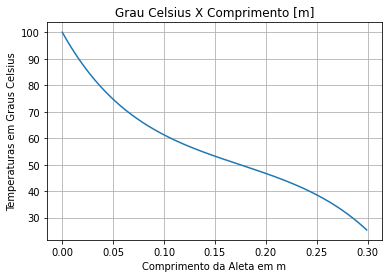

In [3]:
#ANALITICAL
result_analitical=[]

lista=np.arange(0,L,1e-3)

m=calculate_m(h,p,k,Atr)

theta=calculate_theta(Text,Tinf)

M=calculate_M(h,p,Atr,k,theta)

for values in lista:
    result_analitical.append(teste(calculate_theta(Text, Tinf),calculate_theta(Tb, Tinf),m,values,L) * calculate_theta(Tb, Tinf) + Tinf)

plt.plot(lista,result_analitical)
plt.xlabel("Comprimento da Aleta em m")
plt.ylabel("Temperaturas em Graus Celsius")
plt.title("Grau Celsius X Comprimento [m]")
plt.grid()
plt.show()

0.6047999999955231
convergiu


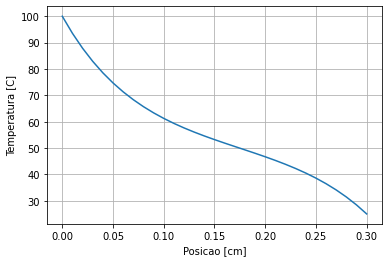

In [4]:
#NUMERICAL
dt = (dx**2/(a*(h*p*dx**2/k*Atr + 2)))*0.9
interval = 1000 #número de passos
n = len(np.arange(0, interval, dt))
TM = np.zeros((n,nx))
errors = []

# Condição inicial nos nós internos
TM[0,1:nx-1] = 0.0001
# Temperatura [C] em x=0
TM[:,0]=Tb
# Temperatura [C] em x=L
TM[:,nx-1]=Text


print(dt)
for l in range(0,n-1):
    for i in range(1,nx-1):
        TM[l+1,i] = a * dt * ((TM[l,i+1]-2*TM[l,i]+TM[l,i-1])/dx**2 - ct * (TM[l,i] - Tinf)) + TM[l,i]
    error = (TM[l+1, i] - TM[l, i])/TM[l+1, i]
    if tol >= error:
        print("convergiu")
        break


# Posições dos nós
x = np.linspace(0.0,L,nx)
# Temperatura em todos pontos no instante considerado
T = np.array(TM[l,:])
# Plot
plt.plot(x,T)
plt.ylabel('Temperatura [C]')
plt.xlabel('Posicao [cm]')
plt.grid()
plt.show()
# OUTPUTS
# Gráfico temp x posicao com o resultado numérico
# Gráfico temp x posicao com o resultado analítico